In [15]:
from ema_workbench import load_results
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




False    1227
dtype: int64

In [71]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario, IntegerParameter)
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ema_workbench import load_results
from ema_workbench.analysis import prim


In [72]:
results = load_results('./SECOND candidate solutions MORDM 1000scenarios.tar.gz')

x, outcomes = results

outcomesdf = pd.DataFrame.from_dict(outcomes)

In [73]:
y = (outcomesdf['RfR Total Costs'] <= 0) & (outcomesdf['A.1_Expected Number of Deaths'] <= 0) & (outcomesdf['A.2_Expected Number of Deaths'] <= 0.00148) & (outcomesdf['A.3_Expected Number of Deaths'] <= 0.001)

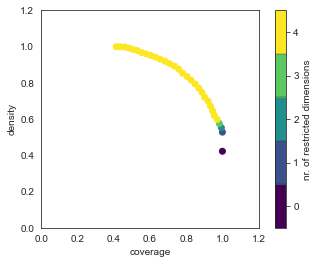

In [74]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box = prim_obj.find_box()

box.show_tradeoff()
plt.show()

/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


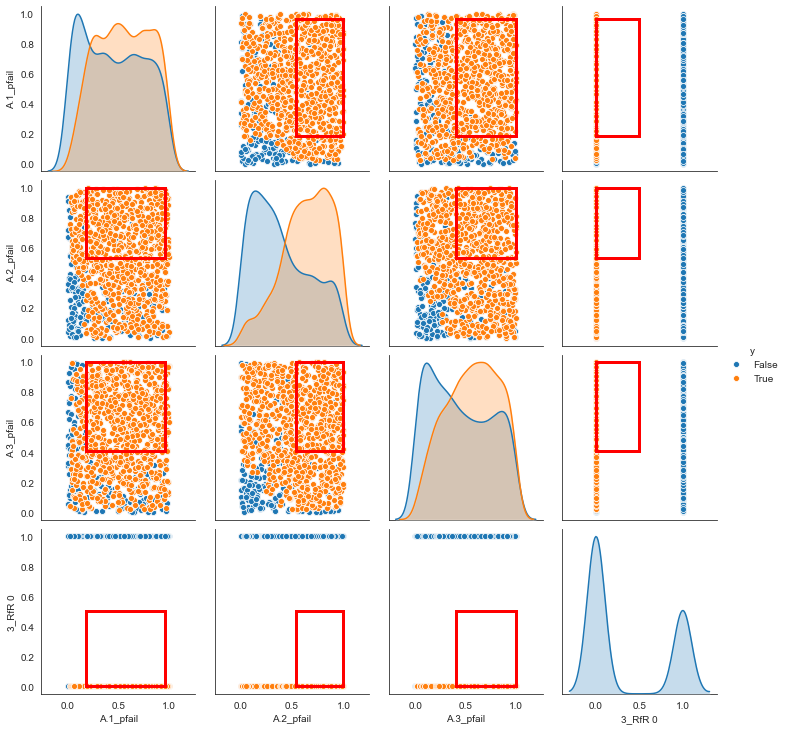

In [75]:
box.show_pairs_scatter(30)
plt.show()

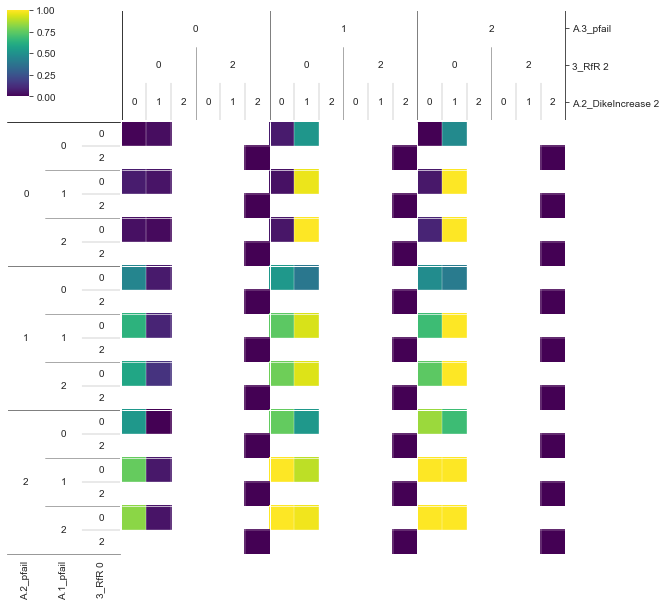

<Figure size 432x288 with 0 Axes>

In [76]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y)
plt.show()
plt.savefig('dimensional stacking.png')

/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; au

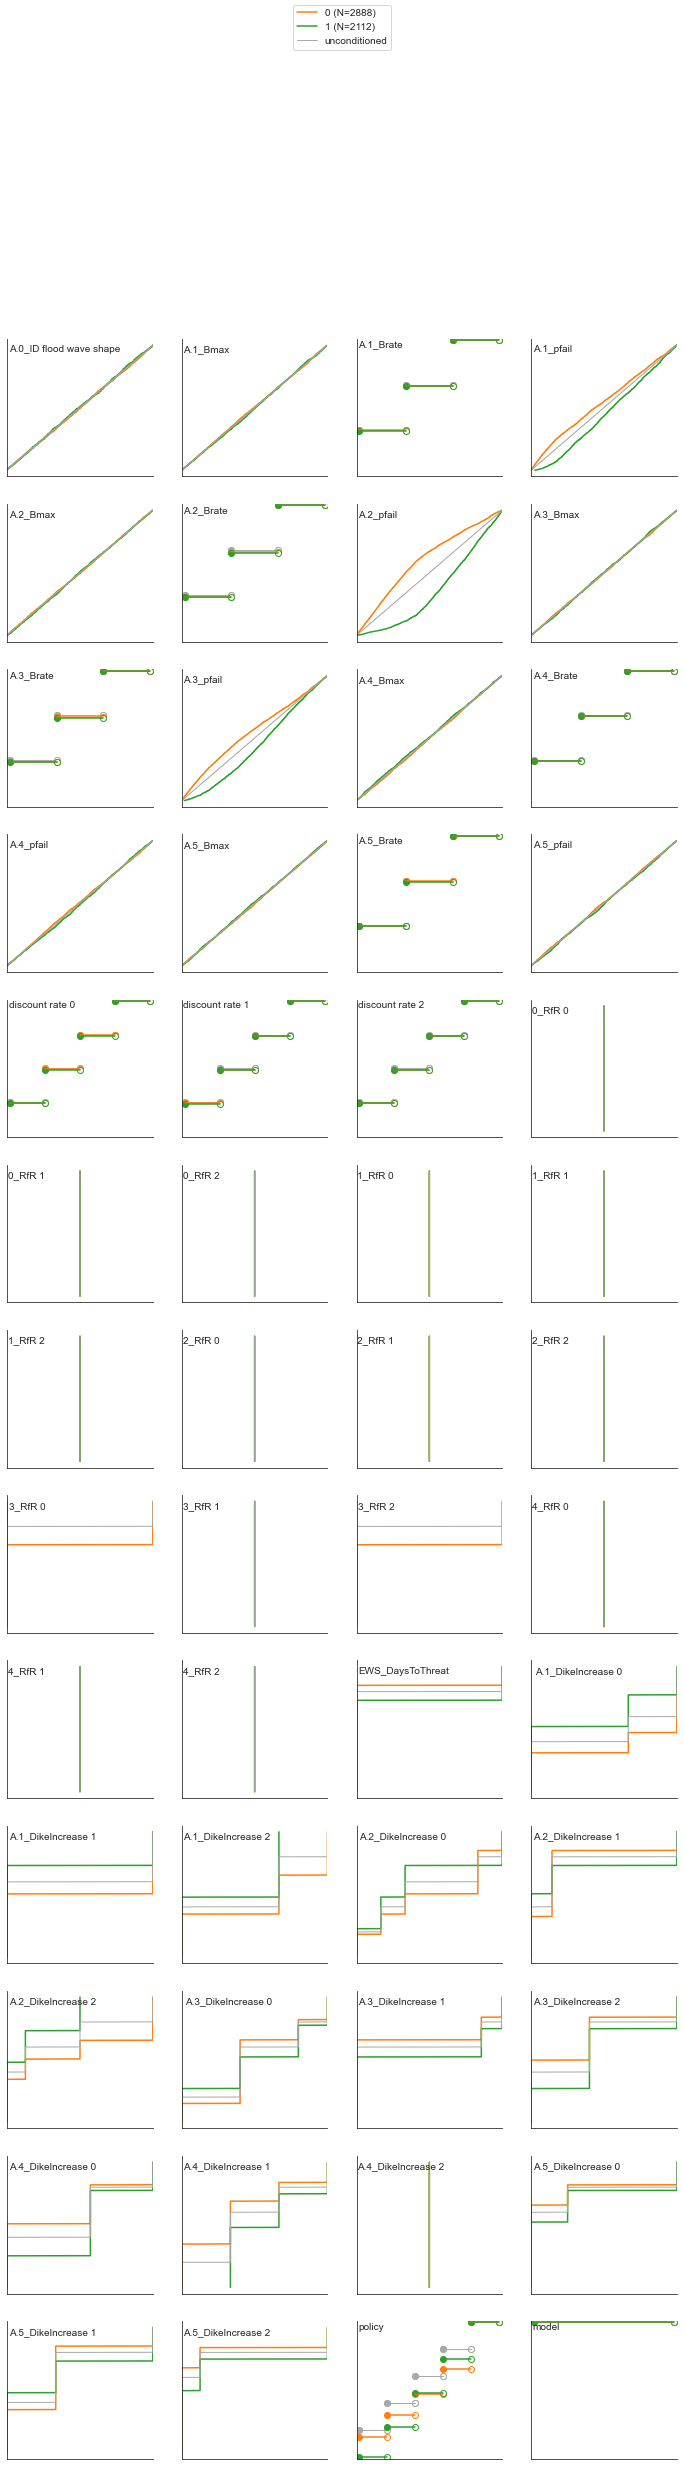

<Figure size 432x288 with 0 Axes>

In [102]:
from numpy.lib import recfunctions as rf
from ema_workbench.analysis import regional_sa

sns.set_style()

fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
plt.savefig('sensitivity analysis.png')

In [101]:
from ema_workbench.analysis import feature_scoring


fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()



TypeError: Singleton array array(False) cannot be considered a valid collection.